In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lego-database/inventories.csv
/kaggle/input/lego-database/themes.csv
/kaggle/input/lego-database/inventory_sets.csv
/kaggle/input/lego-database/parts.csv
/kaggle/input/lego-database/part_categories.csv
/kaggle/input/lego-database/colors.csv
/kaggle/input/lego-database/downloads_schema.png
/kaggle/input/lego-database/sets.csv
/kaggle/input/lego-database/inventory_parts.csv
/kaggle/input/examplelegodata/themes.csv
/kaggle/input/examplelegodata/sets.csv


<img src="https://i.imgur.com/49FNOHj.jpg">

### As part of the DS Coding class, this analysis will answer the following questions:

What is the most enormous LEGO set ever created and how many parts did it have?

In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?



Data from public lego-database

# Data Source
ReBrickable has compiled data on legos

Importing Data

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [26]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lego-database/inventories.csv
/kaggle/input/lego-database/themes.csv
/kaggle/input/lego-database/inventory_sets.csv
/kaggle/input/lego-database/parts.csv
/kaggle/input/lego-database/part_categories.csv
/kaggle/input/lego-database/colors.csv
/kaggle/input/lego-database/downloads_schema.png
/kaggle/input/lego-database/sets.csv
/kaggle/input/lego-database/inventory_parts.csv
/kaggle/input/examplelegodata/themes.csv
/kaggle/input/examplelegodata/sets.csv


In [27]:
#pd.set_option('display.max_rows')
color_df = pd.read_csv('/kaggle/input/lego-database/colors.csv')
themes_df = pd.read_csv('/kaggle/input/examplelegodata/themes.csv')

In [28]:
color_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [29]:
color_df.shape

(135, 4)

In [30]:
color_df.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

In [31]:
uniquecolors = color_df['name'].nunique()
print(uniquecolors)

135


In [32]:
color_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [33]:
color_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [34]:
sets_df = pd.read_csv('/kaggle/input/examplelegodata/sets.csv')

In [35]:
sets_df.shape

(15710, 5)

In [36]:
sets_df.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [37]:
sets_df['year'].idxmin()

9521

In [38]:
sets_df.iloc[9521]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

Which year did Lego start production and what was the product?

In [39]:
sets_df.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


How many products in production in first year?

In [40]:
sets_df[sets_df['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Which product has maximum number of parts?

In [41]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


To count the number of sets produced each year, group by year and count()

In [42]:
sets_by_year = sets_df.groupby('year').count()

In [43]:
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

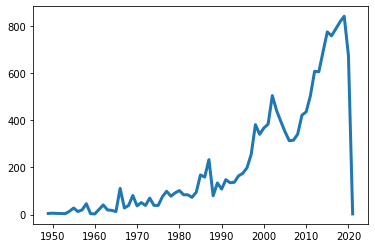

In [44]:
plt.plot(sets_by_year.index, sets_by_year.set_num, 
             linewidth=3)

We take off data point from 2020 and 2021 since its not complete data

Slice 2 data points off from the year and the set_num data

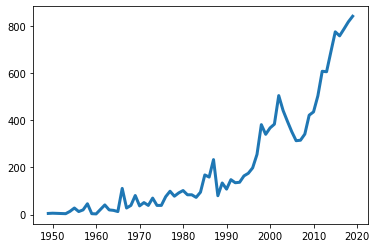

In [45]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], 
             linewidth=3, label=sets_by_year.set_num)

In [46]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [47]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


## To find out how many themes per year we aggregate unique theme per year

In [48]:
themes_per_year = sets_df.groupby('year').agg({'theme_id':pd.Series.nunique})

In [49]:
themes_per_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [50]:
themes_per_year.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


## Replace column name 'theme_id' with 'num_themes'

In [51]:
themes_per_year.rename(columns = {'theme_id':'num_theme'}, inplace=True)

In [52]:
themes_per_year.head()

,num_theme
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [53]:
themes_per_year.tail()

,num_theme
year,
2017,89
2018,93
2019,78
2020,82
2021,1


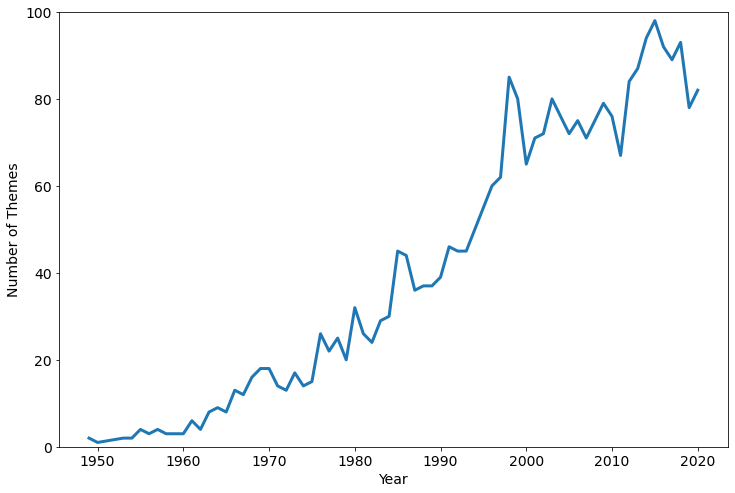

In [75]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 100)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Themes', fontsize=14)
plt.plot(themes_per_year.index[:-1], themes_per_year.num_theme[:-1], 
             linewidth=3, label=themes_per_year.num_theme)

## Plotting number of sets per year and number of themes per year on same graph

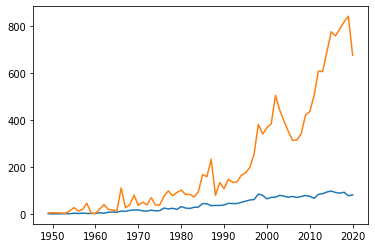

In [55]:

plt.plot(themes_per_year.index[:-1], themes_per_year.num_theme[:-1])
plt.plot(sets_by_year.index[:-1], sets_by_year.set_num[:-1])

Text(0, 0.5, 'Number of sets')

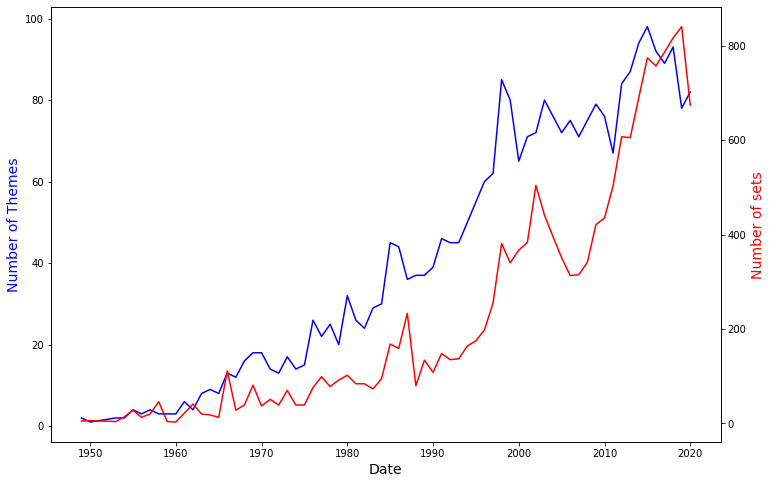

In [76]:
plt.figure(figsize=(12,8))
ax1 = plt.gca() #get current axis
ax2 = plt.twinx() # copy the axis that shares the same x axis
ax1.plot(themes_per_year.index[:-1], themes_per_year.num_theme[:-1], color='blue')
ax2.plot(sets_by_year.index[:-1], sets_by_year.set_num[:-1], color='red')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Number of Themes', color='blue', fontsize=14)
ax2.set_ylabel('Number of sets', color='red', fontsize=14)

Average number of parts used by Lego per year and how it has changed

In [57]:
Avg_num_parts = sets_df.groupby('year').agg({'num_parts':pd.Series.mean})
Avg_num_parts.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [58]:
Avg_num_parts.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


Creating a scatter plot to visualize Ang_num_part dataframe

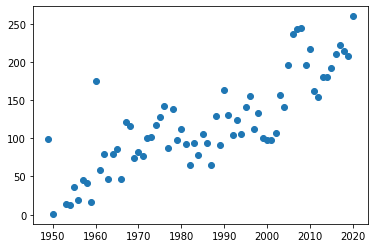

In [59]:
plt.scatter(Avg_num_parts.index[:-1], Avg_num_parts.num_parts[:-1])

Display the database schema (link: https://i.imgur.com/Sg4lcjx.png) inside the Notebook.

<img src="https://i.imgur.com/Sg4lcjx.png" alt="Display Database Schema">

In [60]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [61]:
themes_df.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


In [62]:
themes_per_year.head()

,num_theme
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [63]:
themes_per_year.shape

(71, 1)

In [64]:
themes_df[themes_df.name == 'X-Men']

,id,name,parent_id
593,707,X-Men,696.0


In [65]:
sets_df[sets_df.theme_id == 707]

,set_num,name,year,theme_id,num_parts
9377,6866-1,Wolverine's Chopper Showdown,2012,707,198
11508,76022-1,X-Men vs. The Sentinel,2014,707,337


In [66]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [67]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [68]:
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

Convert the series, set_theme_count into a dataframe

In [69]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})

In [70]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


Merging DataFrames Themes_df and set_theme_count on id

In [71]:
merged_df = pd.merge(themes_df, set_theme_count, on='id')
merged_df.head()

,id,name,parent_id,set_count
0,1,Technic,NaN,167
1,2,Arctic Technic,1.0,4
2,3,Competition,1.0,18
3,4,Expert Builder,1.0,39
4,5,Model,1.0,12


In [72]:
merged_df[merged_df.name=='Star Wars']

,id,name,parent_id,set_count
17,18,Star Wars,1.0,11
134,158,Star Wars,NaN,753
158,209,Star Wars,207.0,10
193,261,Star Wars,258.0,2


Sort the Dataframe into new df sorted by number of sets

In [73]:
merged_sum_df = merged_df.sort_values(by='set_count', ascending=False)
merged_sum_df.head()

,id,name,parent_id,set_count
134,158,Star Wars,NaN,753
384,501,Gear,NaN,656
379,494,Friends,NaN,398
336,435,Ninjago,NaN,356
386,503,Key Chain,501.0,329


####As can be seen from chart below, Lego has diversified into many products such as key chains, gears etc that also include school bags. Would be interesting to see if adding these non lego items dilutes the brand or increases revenue.

Text(0.5, 1.0, 'Top ten themes as per number of sets')

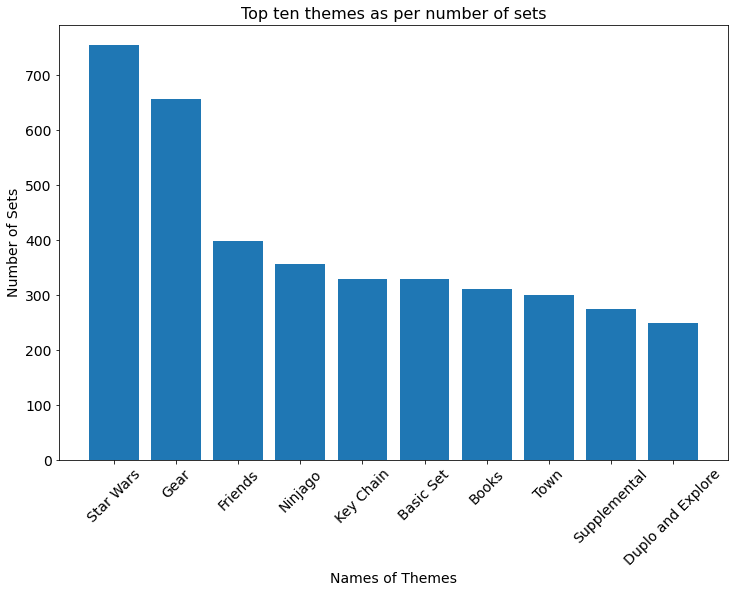

In [77]:
plt.figure(figsize=(12,8))
plt.bar(merged_sum_df.name[:10], merged_sum_df.set_count[:10])
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Names of Themes', fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.title('Top ten themes as per number of sets', fontsize=16)